# Importeer data


In [54]:
import kagglehub
import pandas as pd
import sklearn
import numpy as np 
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
db = pd.read_csv(path + "/Iris.csv")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\joema\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [55]:

db

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Decision Tree

In [56]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'species' column
db_encoded = pd.get_dummies(db, columns=['species'])

# Prepare features and labels
X_df = db_encoded.drop(columns=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'])
y_df = db_encoded[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

list(X_df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# MAX DEPTH

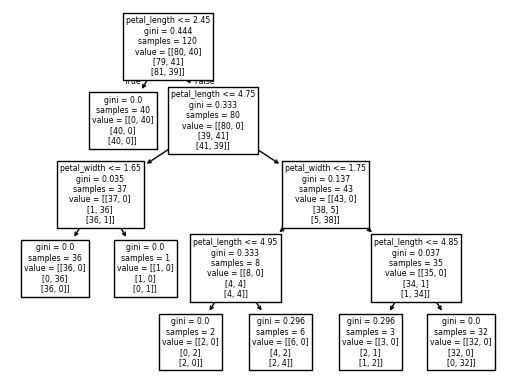

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=X_df.columns)
plt.show()

In [58]:
# Create a DataFrame for predicted labels with appropriate column names
predicted_df = pd.DataFrame(dtree.predict(X_test), columns=y_test.columns)
predicted_df = predicted_df.add_prefix('Predicted_')

# Concatenate true and predicted labels for comparison
model_results_frame = pd.concat([y_test.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)
model_results_frame

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Predicted_species_Iris-setosa,Predicted_species_Iris-versicolor,Predicted_species_Iris-virginica
0,False,True,False,False,True,False
1,True,False,False,True,False,False
2,False,False,True,False,False,True
3,False,True,False,False,True,False
4,False,True,False,False,True,False
5,True,False,False,True,False,False
6,False,True,False,False,True,False
7,False,False,True,False,False,True
8,False,True,False,False,True,False
9,False,True,False,False,True,False


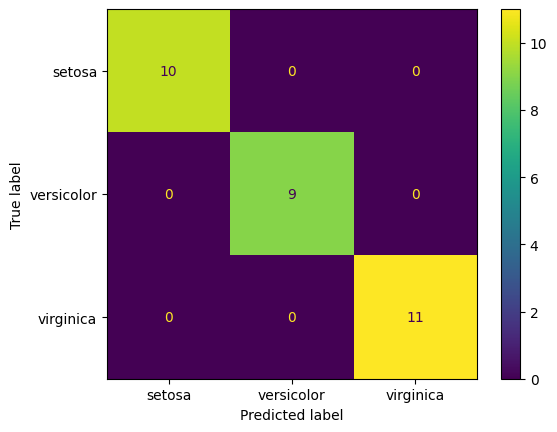

In [59]:
# Convert one-hot encoded columns to single label values
true_labels = np.argmax(model_results_frame.iloc[:, :3].values, axis=1)
pred_labels = np.argmax(model_results_frame.iloc[:, 3:].values, axis=1)

confusion_matrix = metrics.confusion_matrix(true_labels, pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['setosa', 'versicolor', 'virginica'])

cm_display.plot()
plt.show()

In [60]:
best_accuracy = 0
best_depth = 0

max_depths = range(1, 40)
for depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print(f"Max depth: {depth}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\n🎯 Highest Accuracy: {best_accuracy:.4f} at Max Depth: {best_depth}")

Max depth: 1, Accuracy: 0.6333
Max depth: 2, Accuracy: 0.9667
Max depth: 3, Accuracy: 0.9667
Max depth: 4, Accuracy: 1.0000
Max depth: 5, Accuracy: 1.0000
Max depth: 6, Accuracy: 1.0000
Max depth: 7, Accuracy: 1.0000
Max depth: 8, Accuracy: 1.0000
Max depth: 9, Accuracy: 1.0000
Max depth: 10, Accuracy: 1.0000
Max depth: 11, Accuracy: 1.0000
Max depth: 12, Accuracy: 1.0000
Max depth: 13, Accuracy: 1.0000
Max depth: 14, Accuracy: 1.0000
Max depth: 15, Accuracy: 1.0000
Max depth: 16, Accuracy: 1.0000
Max depth: 17, Accuracy: 1.0000
Max depth: 18, Accuracy: 1.0000
Max depth: 19, Accuracy: 1.0000
Max depth: 20, Accuracy: 1.0000
Max depth: 21, Accuracy: 1.0000
Max depth: 22, Accuracy: 1.0000
Max depth: 23, Accuracy: 1.0000
Max depth: 24, Accuracy: 1.0000
Max depth: 25, Accuracy: 1.0000
Max depth: 26, Accuracy: 1.0000
Max depth: 27, Accuracy: 1.0000
Max depth: 28, Accuracy: 1.0000
Max depth: 29, Accuracy: 1.0000
Max depth: 30, Accuracy: 1.0000
Max depth: 31, Accuracy: 1.0000
Max depth: 32, Ac

In [61]:
metrics.accuracy_score(true_labels, pred_labels)

1.0

# Logic Regression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [68]:
db
X = db.drop(columns=['species'])
y = db['species']
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 60
)

In [70]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [71]:
y_pred= reg_model.predict(X_test)
y_pred

array([[ 0.16295888,  0.6492762 ,  0.18776492],
       [ 0.23217208,  0.41301884,  0.35480908],
       [ 0.20493584,  0.43212476,  0.3629394 ],
       [ 0.88157002,  0.27750526, -0.15907528],
       [ 0.10435001,  0.61826855,  0.27738144],
       [ 0.94912486,  0.18304053, -0.13216539],
       [ 0.20166102,  0.63496856,  0.16337041],
       [ 1.19974598, -0.22284739,  0.02310141],
       [ 0.84327086,  0.12536924,  0.03135991],
       [ 0.00137244,  0.56468141,  0.43394615],
       [ 1.00944317,  0.07248269, -0.08192586],
       [ 1.22010218, -0.38423292,  0.16413074],
       [-0.03414119,  0.40486407,  0.62927712],
       [-0.0367439 ,  0.672056  ,  0.3646879 ],
       [-0.1145547 ,  0.49837118,  0.61618352],
       [ 0.17630684,  0.45507133,  0.36862183],
       [-0.15349074,  0.25294106,  0.90054969],
       [ 0.1093332 ,  0.60211873,  0.28854807],
       [ 0.83006029,  0.29108241, -0.1211427 ],
       [-0.05546007, -0.03452743,  1.0899875 ],
       [-0.10737279,  0.14549339,  0.961

In [73]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_Flower'})
prediction_df

,Predicted_Flower,1,2
0,0.162959,0.649276,0.187765
1,0.232172,0.413019,0.354809
2,0.204936,0.432125,0.362939
3,0.881570,0.277505,-0.159075
4,0.104350,0.618269,0.277381
5,0.949125,0.183041,-0.132165
6,0.201661,0.634969,0.163370
7,1.199746,-0.222847,0.023101
8,0.843271,0.125369,0.031360
9,0.001372,0.564681,0.433946


In [75]:
# Concatenate y_test and prediction_df for comparison
y_test_prediction_merge = pd.concat([y_test.reset_index(drop=True), prediction_df], axis=1)
y_test_prediction_merge

,Iris-setosa,Iris-versicolor,Iris-virginica,Predicted_Flower,1,2
0,False,True,False,0.162959,0.649276,0.187765
1,False,True,False,0.232172,0.413019,0.354809
2,False,True,False,0.204936,0.432125,0.362939
3,True,False,False,0.881570,0.277505,-0.159075
4,False,True,False,0.104350,0.618269,0.277381
5,True,False,False,0.949125,0.183041,-0.132165
6,False,True,False,0.201661,0.634969,0.163370
7,True,False,False,1.199746,-0.222847,0.023101
8,True,False,False,0.843271,0.125369,0.031360
9,False,False,True,0.001372,0.564681,0.433946


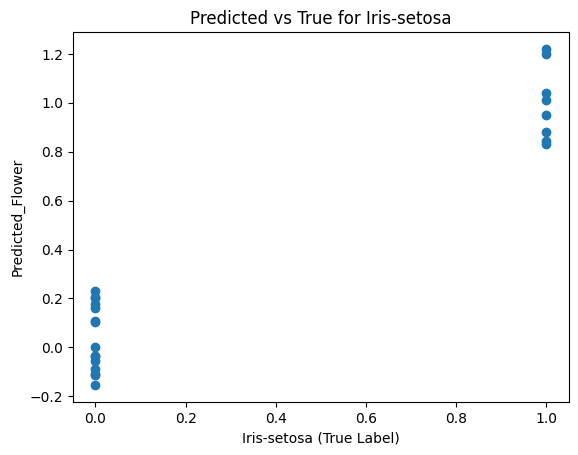

In [77]:
plt.scatter(y_test_prediction_merge['Iris-setosa'], y_test_prediction_merge['Predicted_Flower'])
plt.xlabel('Iris-setosa (True Label)')
plt.ylabel('Predicted_Flower')
plt.title('Predicted vs True for Iris-setosa')
plt.show()